In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
class LinSVR:
    EPS = 0.01
    def __init__(self, C: float = 0.1):
        self.C = C
        self.w = None
        self.eps = None
    
    
    def fit(self, X, y, lr: float = 0.01, max_iter: int = 200, eps: float = 1e-3):
        n, m = X.shape
        self.eps = eps
        X_train = np.hstack([X, np.ones((n, 1))])
        
        if self.w is None:
            self.w = np.random.rand(m+1)
        
        self.loss = []
        for e in range(max_iter):
            train_loss = 0
            for i in range(n):
                margin = np.dot(self.w, X_train[i]) - y[i]
                if np.abs(margin) < eps:
                    self.w -= lr * self.C * self.w / max_iter
                else:
                    self.w -= lr * (self.C * self.w / max_iter + np.sign(margin) * X_train[i])
                train_loss += self.margin_loss(X_train[i], y_train[i])
            self.loss.append(train_loss / n)
    
    
    def predict(self, X):
        n, m = X.shape
        X_pred = np.hstack([X, np.ones((n,1))])
        res = []
        for i in range(n):
            res.append(np.dot(self.w, X_pred[i]))
        return np.array(res)
    
    
    def margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.C * np.dot(self.w, self.w) / 2


    def hinge_loss(self, x, y):
        return max(0.0, np.abs(np.dot(self.w, x) - y) - self.eps)

# Toy Data

## $$kx+b$$

In [4]:
def lin_function(x):
    return -5 * x + 30

In [5]:
def plot_lin_reg(y_pred):
    plt.figure(figsize=(14,9))
    plt.scatter(x_train, y_train, label='train', c='b')
    plt.scatter(x_test, y_test, label='test', c='orange')
    plt.plot(X, lin_function(X), label='actual', c='g')
    plt.plot(x_test, y_pred, label='predicted', c='cyan', linestyle=':')
    plt.grid()
    plt.legend()

In [6]:
X = np.linspace(-3, 8, 70)
y = lin_function(X) + np.random.randn(70) * 4
X = X.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [7]:
svr = LinSVR(C=0.01)
svr.fit(x_train, y_train, max_iter=500)

In [8]:
svr.w

array([-4.88968699, 30.02871998])

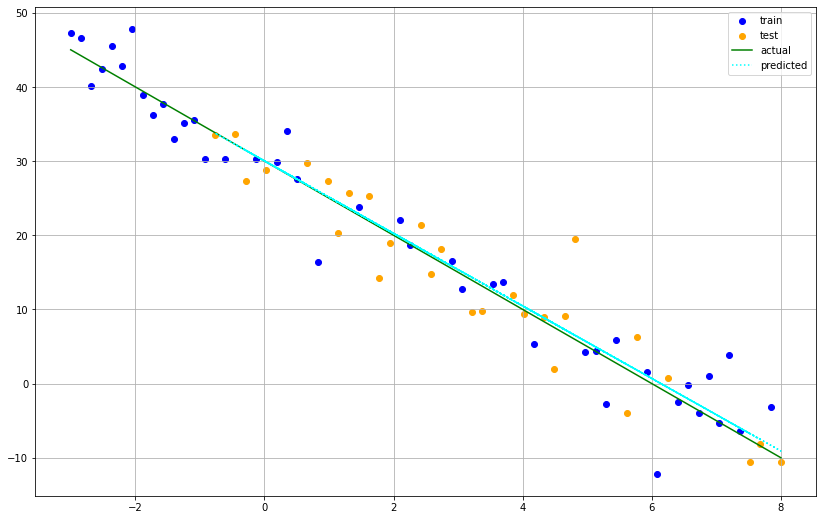

In [9]:
plot_lin_reg(svr.predict(x_test))

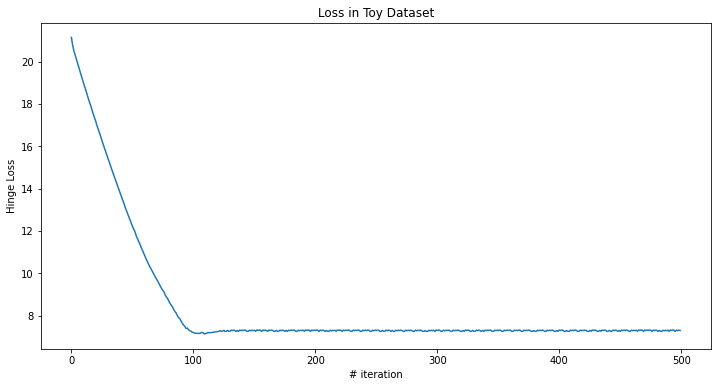

In [10]:
plt.figure(figsize=(12,6))
plt.plot(svr.loss)
plt.xlabel('# iteration')
plt.ylabel('Hinge Loss')
plt.title('Loss in Toy Dataset')
plt.show()

## $$ax+bx^2+cx^3+d$$

In [11]:
true_coef = [-5, 14, -8, 30]

In [12]:
def poly_function(x, w):
    return w[0] * x[:, 0] + w[1] * x[:, 1] + w[2] * x[:, 2] + w[3]

In [13]:
x = np.linspace(-6, 6, 70)
x = x.reshape(-1, 1)
X = np.hstack([x, x**2, x**3])

y = poly_function(X, true_coef)

In [14]:
X.shape, y.shape

((70, 3), (70,))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [16]:
svr = LinSVR(C=0.01)
svr.fit(x_train, y_train, max_iter=500)

In [17]:
svr.w

array([-4.91656237, 14.8596127 , -8.31199641, 29.89972175])

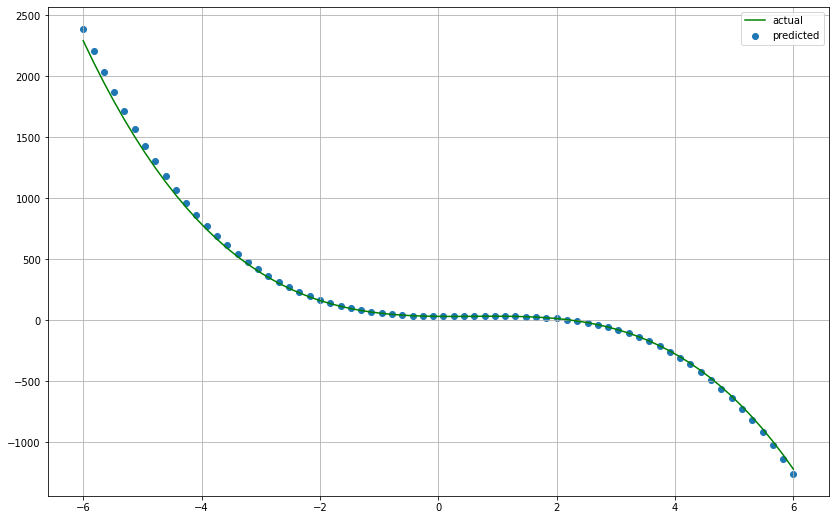

In [18]:
plt.figure(figsize=(14,9))
plt.plot(x, poly_function(X, true_coef), label='actual', c='g')
plt.scatter(x, poly_function(X, svr.w), label='predicted')
plt.grid()
plt.legend()

In [19]:
true_coef

[-5, 14, -8, 30]

In [20]:
svr.w.round(2)

array([-4.92, 14.86, -8.31, 29.9 ])

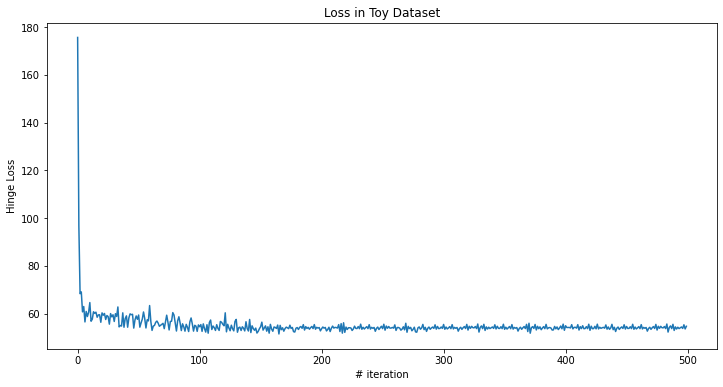

In [21]:
plt.figure(figsize=(12,6))
plt.plot(svr.loss)
plt.xlabel('# iteration')
plt.ylabel('Hinge Loss')
plt.title('Loss in Toy Dataset')
plt.show()

# California Housing Data

In [22]:
scaler = StandardScaler()

In [23]:
X, y = fetch_california_housing().data, fetch_california_housing().target

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
%%time
skl_svr = LinearSVR(dual=False, random_state=42, loss='squared_epsilon_insensitive')
skl_svr.fit(x_train, y_train)

CPU times: user 8.97 ms, sys: 2.46 ms, total: 11.4 ms
Wall time: 9.7 ms


LinearSVR(dual=False, loss='squared_epsilon_insensitive', random_state=42)

In [26]:
%%time
svr = LinSVR(C=1.0)
svr.fit(x_train, y_train, max_iter=500)

CPU times: user 1min 35s, sys: 715 ms, total: 1min 36s
Wall time: 1min 35s


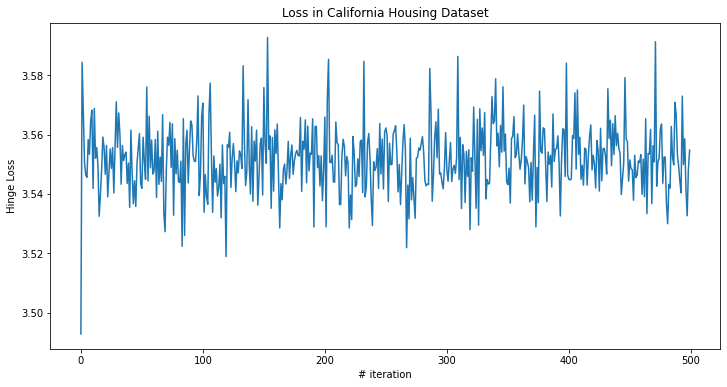

In [27]:
plt.figure(figsize=(12,6))
plt.plot(svr.loss)
plt.xlabel('# iteration')
plt.ylabel('Hinge Loss')
plt.title('Loss in California Housing Dataset')
plt.show()

## metrics

In [28]:
mean_squared_error(y_test, skl_svr.predict(x_test)), mean_absolute_error(y_test, skl_svr.predict(x_test))

(0.5438518976577832, 0.5308443482069111)

In [29]:
mean_squared_error(y_test, svr.predict(x_test)), mean_absolute_error(y_test, svr.predict(x_test))

(0.6326288405719401, 0.5352456798614966)

## weights

In [30]:
np.concatenate([skl_svr.coef_, skl_svr.intercept_]).round(2)

array([ 0.85,  0.13, -0.32,  0.37, -0.  , -0.04, -0.87, -0.84,  2.07])

In [31]:
svr.w.round(2)

array([ 1.01,  0.14, -0.33,  0.52,  0.02, -0.38, -0.68, -0.76,  2.07])